In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("V:\\Datasets\\titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df[["Survived","Pclass","Sex","Age","Fare"]]

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
# Cleaning the Dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [8]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x : x.fillna(x.mean()))

C:\Users\svasu\AppData\Local\Temp/ipykernel_21068/3882240602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby('Sex')['Age'].transform(lambda x : x.fillna(x.mean()))


In [10]:
# Changing Category column to numerical Column
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
df['Sex'] = le.fit_transform(df['Sex'])

C:\Users\svasu\AppData\Local\Temp/ipykernel_21068/3909799112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])


In [13]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [18]:
X = df.drop('Survived',axis = 1)
Y = df['Survived']

In [20]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [21]:
# Doing the train_test_split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

In [23]:
# Training the Model
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(random_state = 0, criterion = 'gini' )
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
# Checking the Accuracy of testing Dataset
from sklearn.metrics import accuracy_score

In [27]:
prediction_test = clf.predict(X_test)
accuracy_score(Y_test,prediction_test)

0.7723880597014925

In [29]:
# Checking the accuracy of training Dataset
prediction_train = clf.predict(X_train)
accuracy_score(Y_train,prediction_train)

0.9807383627608347

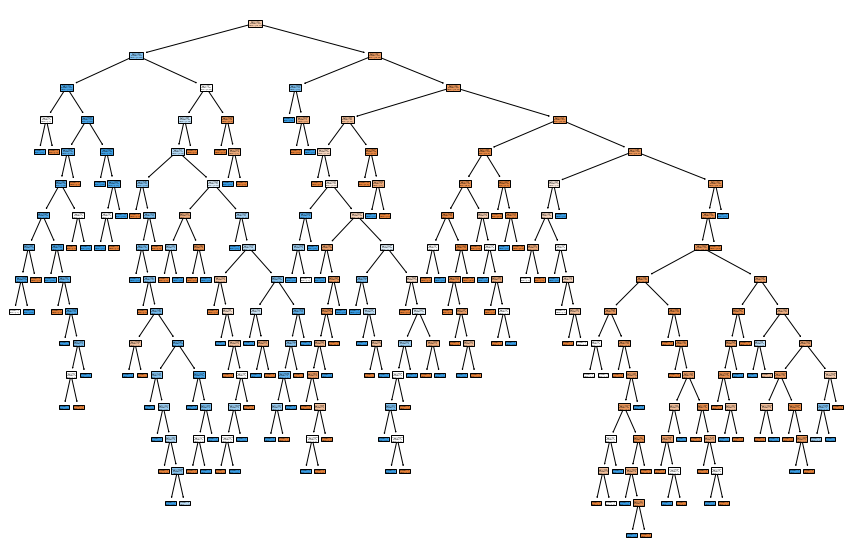

In [30]:
# Vishalizing the Decision Tree
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(clf,filled = True)
plt.show()

In [31]:
# Evaluating our test Data
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(Y_test,prediction_test))
confusion_matrix(Y_test,prediction_test)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



array([[132,  22],
       [ 39,  75]], dtype=int64)

In [35]:
# Evaluating our Training Data
print(classification_report(Y_train,prediction_train))
confusion_matrix(Y_train,prediction_train)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.99      0.96      0.97       228

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



array([[392,   3],
       [  9, 219]], dtype=int64)

In [37]:
# Finding the False Positive Rate and True Negative Rate
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [38]:
df_probs = clf.predict_proba(X_test)[:,1]

In [40]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test,df_probs)

In [1]:
import numpy as np

x = np.array([11, 5])
y = np.array([2, 6])

In [2]:
x, y

(array([11,  5]), array([2, 6]))

In [3]:
print(np.greater_equal(x, y))

[ True False]
